<a href="https://colab.research.google.com/github/fridaruh/ML_and_IA_for_Finance/blob/master/Cluster_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans

El dataset corresponde a "The Ultimate Halloween Candy Power Ranking -
What’s the best Halloween candy?" Obtenido de: https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking

In [2]:
dataset = pd.read_csv('/content/candy.csv')

In [3]:
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
dataset['competitorname'].nunique()

85

In [7]:
dataset.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [9]:
#Hacemos un subset sin el nombre del dulce

X = dataset.drop(['competitorname'], axis=1)

In [10]:
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [23]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=5) #batch_size hace referencia al num mín de elementos en cada grupo

In [24]:
model = kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
kmeans.cluster_centers_

array([[1.16279070e-01, 6.86046512e-01, 9.30232558e-02, 0.00000000e+00,
        2.32558140e-02, 0.00000000e+00, 3.95348837e-01, 2.32558140e-02,
        6.27906977e-01, 4.91965109e-01, 3.52069764e-01, 3.86822537e+01],
       [2.85714286e-02, 5.42857143e-01, 1.42857143e-01, 8.57142857e-02,
        0.00000000e+00, 0.00000000e+00, 2.57142857e-01, 0.00000000e+00,
        6.28571429e-01, 2.33314286e-01, 4.26342852e-01, 2.76695235e+01],
       [8.77777778e-01, 1.22222222e-01, 3.55555556e-01, 3.44444444e-01,
        1.33333333e-01, 2.55555556e-01, 0.00000000e+00, 5.44444444e-01,
        3.88888889e-01, 5.70244436e-01, 6.54355563e-01, 6.79204334e+01],
       [5.00000000e-01, 4.66666667e-01, 7.77777778e-02, 1.55555556e-01,
        6.66666667e-02, 4.44444444e-02, 1.11111111e-01, 3.00000000e-01,
        5.55555556e-01, 4.24755549e-01, 4.83722220e-01, 5.07868537e+01]])

In [26]:
print('Total centros:' , len(kmeans.cluster_centers_))

Total centros: 4


###Generamos las etiquetas de los clusters para el set de datos original

In [27]:
dataset['group'] = kmeans.predict(X)

In [28]:
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,3


In [29]:
dataset['group'].value_counts(normalize=True)

group
3    0.329412
0    0.305882
2    0.270588
1    0.094118
Name: proportion, dtype: float64

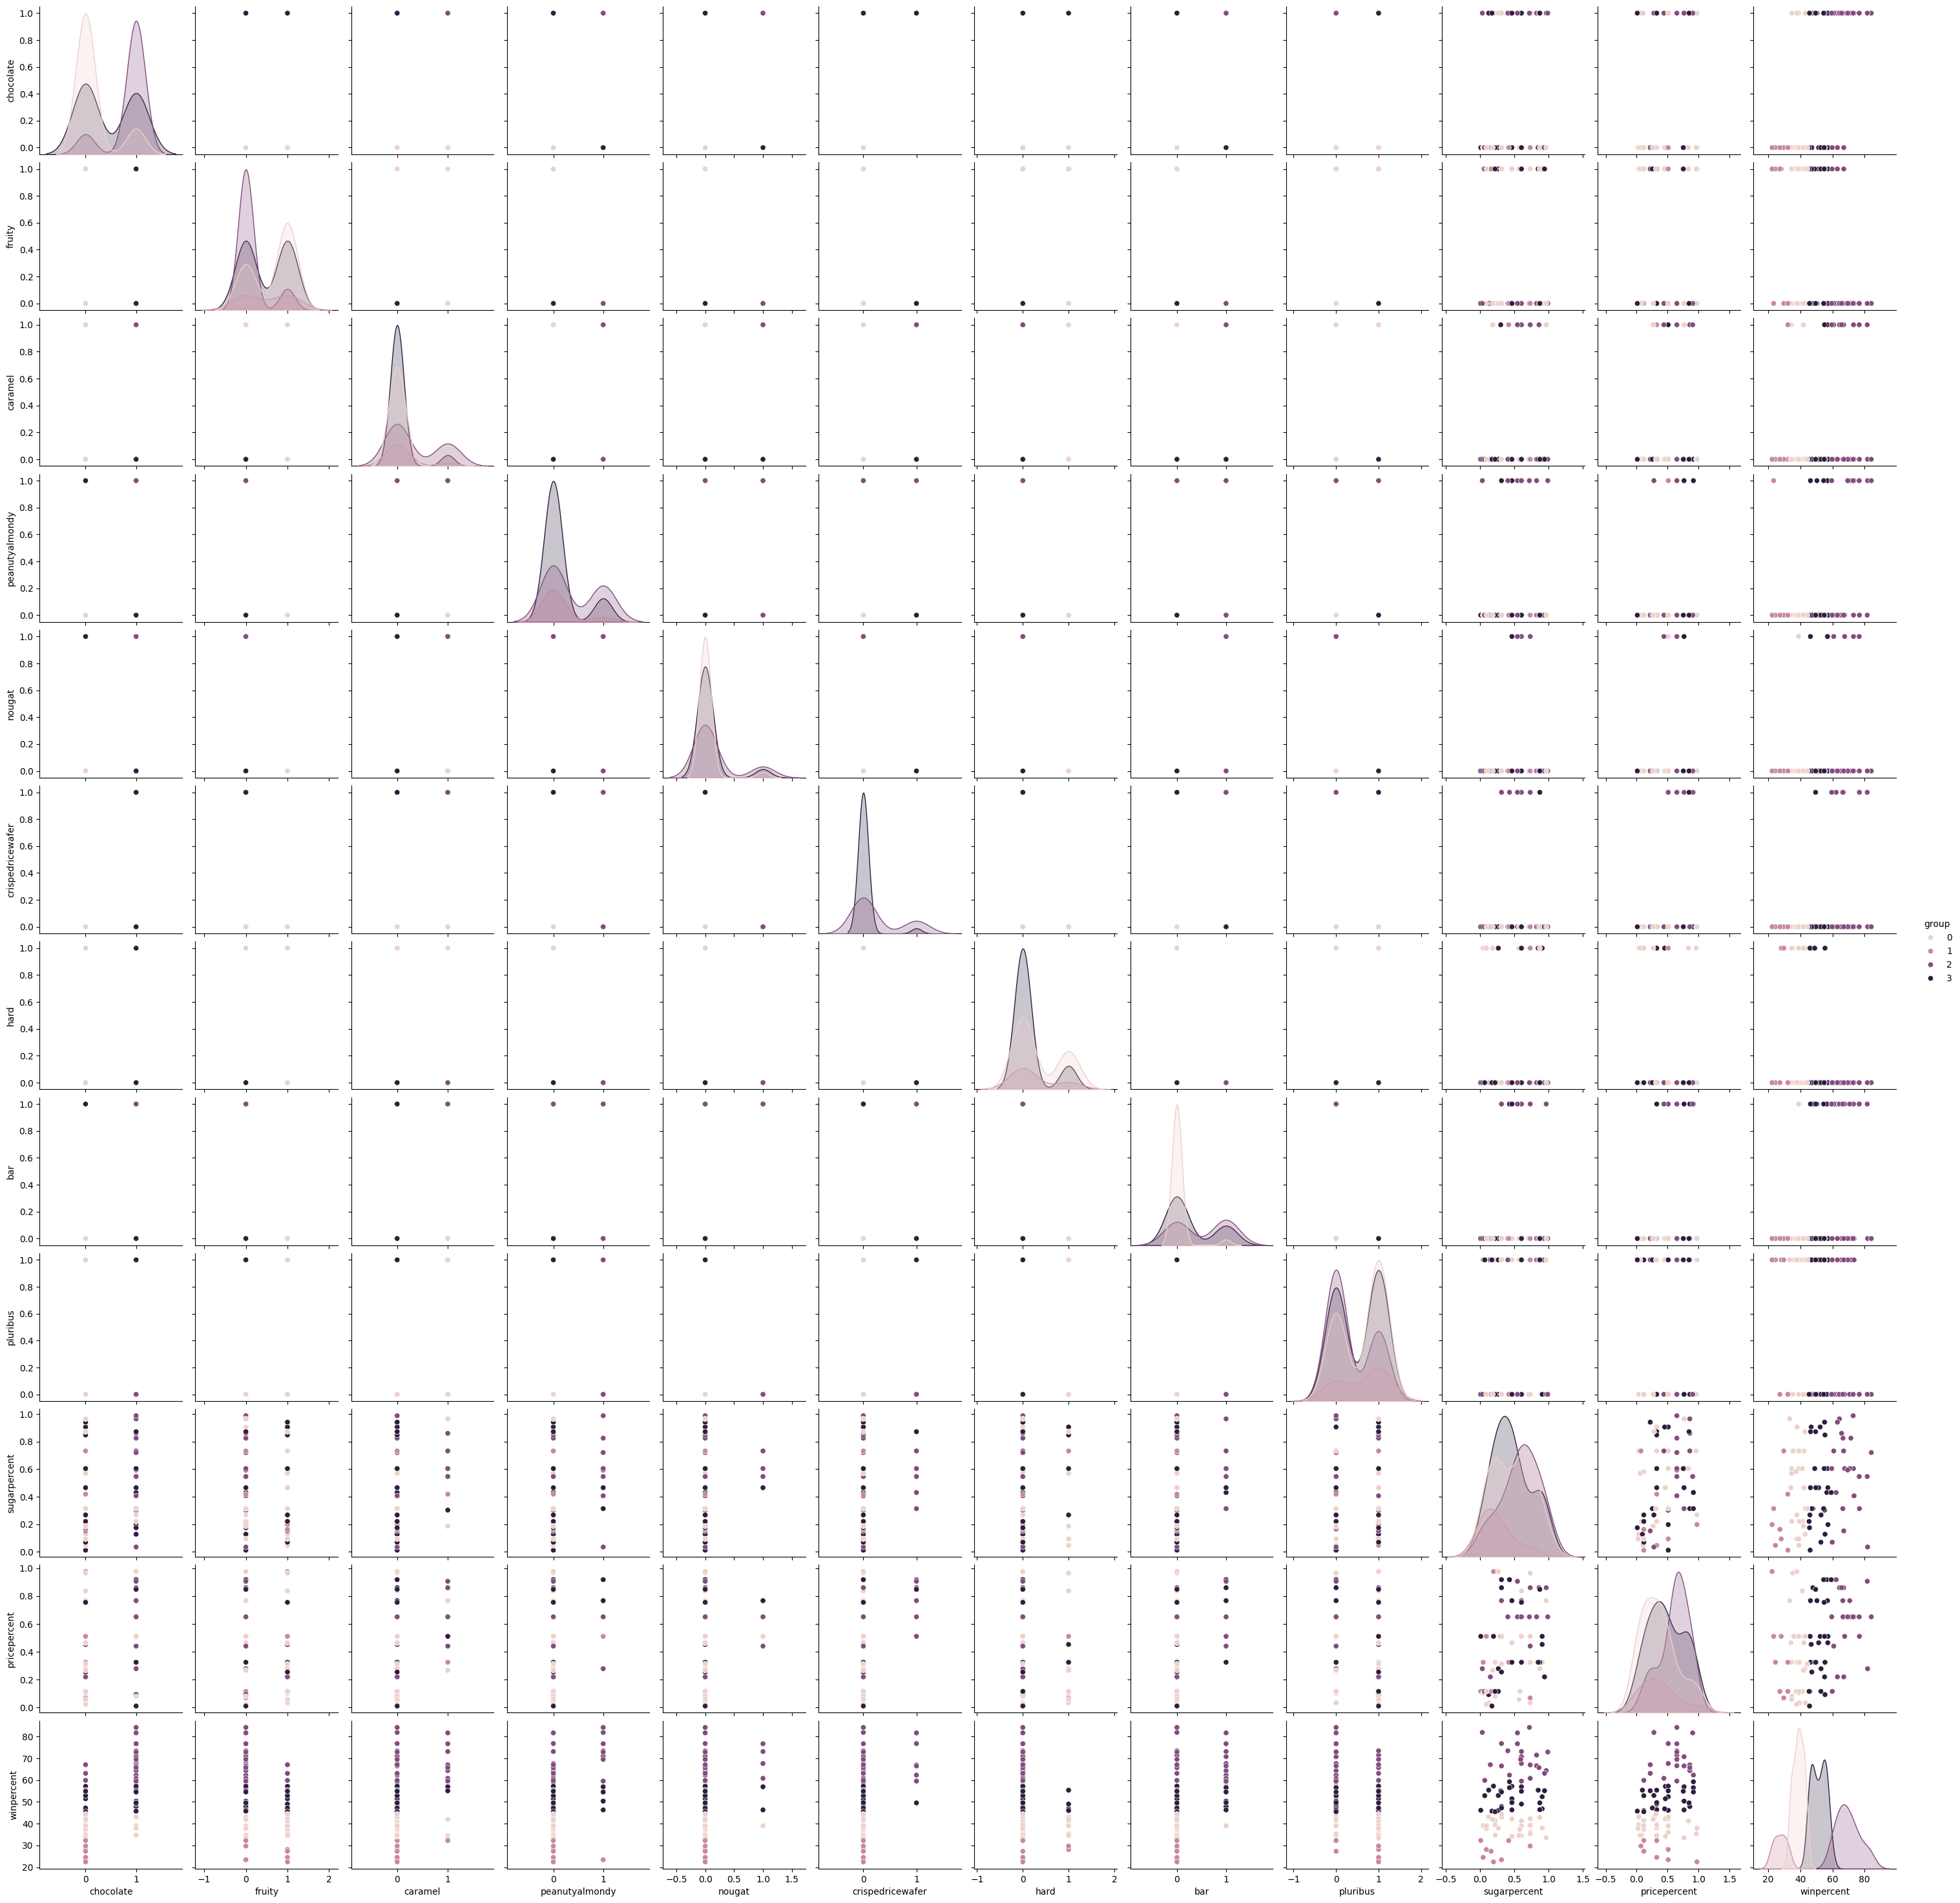

In [30]:
sns.pairplot(dataset, hue='group')

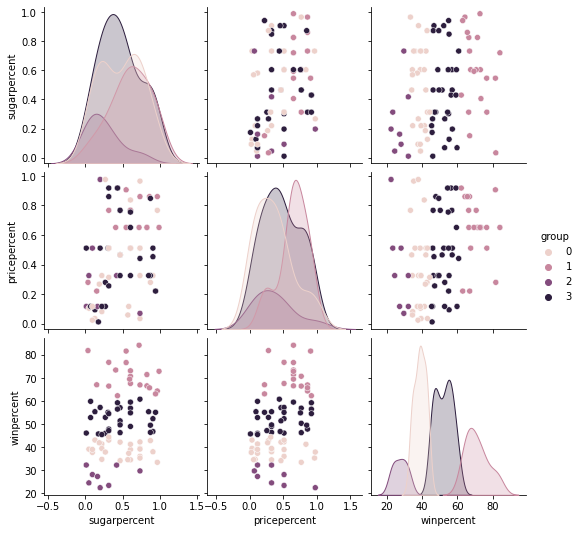

In [ ]:
sns.pairplot(dataset[['sugarpercent','pricepercent','winpercent','group']], hue='group')